In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import Axes3D for some of the 3D visualisation
from mpl_toolkits.mplot3d import Axes3D

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [15]:
df = pd.read_csv('.\dataset.csv')

In [16]:
df

,Unnamed: 0,isbn,book_text_review_count,series,country_code,language_code,popular_shelves,asin,is_ebook,book_average_rating,...,book_id,book_ratings_count,work_id,title,title_without_series,author_average_rating,author_text_reviews_count,author_name,author_ratings_count,Ratings_Dist
0,0,NaN,7,189911,US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,False,4.03,...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ...",3.92,5075,Barbara Hambly,122118,Between 4 and 5
1,1,0345381017,65,NaN,US,eng,"[{'count': '381', 'name': 'to-read'}, {'count'...",NaN,False,3.76,...,438134,689,426994,Bride of the Rat God,Bride of the Rat God,3.92,5075,Barbara Hambly,122118,Between 3 and 4
2,2,0345421906,18,189928,US,eng,"[{'count': '376', 'name': 'to-read'}, {'count'...",NaN,False,3.50,...,438132,498,426992,"Knight of the Demon Queen (Winterlands, #3)","Knight of the Demon Queen (Winterlands, #3)",3.92,5075,Barbara Hambly,122118,Between 3 and 4
3,4,0727884271,47,611220,US,eng,"[{'count': '127', 'name': 'to-read'}, {'count'...",NaN,False,4.10,...,21538610,183,40872609,"Crimson Angel (Benjamin January, #13)","Crimson Angel (Benjamin January, #13)",3.92,5075,Barbara Hambly,122118,Between 4 and 5
4,7,0553089307,8,"432622', '270674', '592908",US,eng,"[{'count': '1754', 'name': 'to-read'}, {'count...",NaN,False,3.26,...,898954,135,1230005,Children of the Jedi,Children of the Jedi,3.92,5075,Barbara Hambly,122118,Between 3 and 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439720,1308910,NaN,1,NaN,US,eng,"[{'count': '21', 'name': 'to-read'}, {'count':...",B00BCW7A8U,True,3.81,...,17372467,16,24159362,The Bloody History of the Croissant,The Bloody History of the Croissant,3.57,1,David Halliday,23,Between 3 and 4
439721,1308915,0316508209,5,839782,US,eng,"[{'count': '17', 'name': 'to-read'}, {'count':...",NaN,False,4.07,...,557760,24,886378,The World of Cézanne: 1839-1906,The World of Cézanne: 1839-1906,3.87,7,Richard W. Murphy,53,Between 4 and 5
439722,1308928,NaN,14,NaN,US,eng,"[{'count': '277', 'name': 'to-read'}, {'count'...",NaN,False,4.88,...,23301898,16,42857470,Love Them Back to LIFE,Love Them Back to LIFE,4.39,21,Ariane Page,33,Between 4 and 5
439723,1308939,0373058993,2,NaN,US,eng,"[{'count': '30', 'name': 'to-read'}, {'count':...",NaN,False,3.22,...,1933546,18,1936006,"Dark Intentions (Silhouette Desire, No 899)","Dark Intentions (Silhouette Desire, No 899)",3.39,36,Carole Buck,338,Between 3 and 4


In [17]:
df.fillna(0)

,Unnamed: 0,isbn,book_text_review_count,series,country_code,language_code,popular_shelves,asin,is_ebook,book_average_rating,...,book_id,book_ratings_count,work_id,title,title_without_series,author_average_rating,author_text_reviews_count,author_name,author_ratings_count,Ratings_Dist
0,0,0,7,189911,US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,False,4.03,...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ...",3.92,5075,Barbara Hambly,122118,Between 4 and 5
1,1,0345381017,65,0,US,eng,"[{'count': '381', 'name': 'to-read'}, {'count'...",0,False,3.76,...,438134,689,426994,Bride of the Rat God,Bride of the Rat God,3.92,5075,Barbara Hambly,122118,Between 3 and 4
2,2,0345421906,18,189928,US,eng,"[{'count': '376', 'name': 'to-read'}, {'count'...",0,False,3.50,...,438132,498,426992,"Knight of the Demon Queen (Winterlands, #3)","Knight of the Demon Queen (Winterlands, #3)",3.92,5075,Barbara Hambly,122118,Between 3 and 4
3,4,0727884271,47,611220,US,eng,"[{'count': '127', 'name': 'to-read'}, {'count'...",0,False,4.10,...,21538610,183,40872609,"Crimson Angel (Benjamin January, #13)","Crimson Angel (Benjamin January, #13)",3.92,5075,Barbara Hambly,122118,Between 4 and 5
4,7,0553089307,8,"432622', '270674', '592908",US,eng,"[{'count': '1754', 'name': 'to-read'}, {'count...",0,False,3.26,...,898954,135,1230005,Children of the Jedi,Children of the Jedi,3.92,5075,Barbara Hambly,122118,Between 3 and 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439720,1308910,0,1,0,US,eng,"[{'count': '21', 'name': 'to-read'}, {'count':...",B00BCW7A8U,True,3.81,...,17372467,16,24159362,The Bloody History of the Croissant,The Bloody History of the Croissant,3.57,1,David Halliday,23,Between 3 and 4
439721,1308915,0316508209,5,839782,US,eng,"[{'count': '17', 'name': 'to-read'}, {'count':...",0,False,4.07,...,557760,24,886378,The World of Cézanne: 1839-1906,The World of Cézanne: 1839-1906,3.87,7,Richard W. Murphy,53,Between 4 and 5
439722,1308928,0,14,0,US,eng,"[{'count': '277', 'name': 'to-read'}, {'count'...",0,False,4.88,...,23301898,16,42857470,Love Them Back to LIFE,Love Them Back to LIFE,4.39,21,Ariane Page,33,Between 4 and 5
439723,1308939,0373058993,2,0,US,eng,"[{'count': '30', 'name': 'to-read'}, {'count':...",0,False,3.22,...,1933546,18,1936006,"Dark Intentions (Silhouette Desire, No 899)","Dark Intentions (Silhouette Desire, No 899)",3.39,36,Carole Buck,338,Between 3 and 4


In [18]:
df_new = df.copy()

In [19]:
df_new = df_new.drop_duplicates(subset=['title'])


In [20]:
#since all country code are US, delete column  
del df_new['country_code']
#removing language code from the hier dataframe 
del df_new['language_code']
#removing the popular shelves 
del df_new['popular_shelves']
#removing asin
del df_new['asin']
#removing description 
del df_new['description']
#removing description
del df_new['format']
#removing link
del df_new['link']
#removing publisher
del df_new['publisher']
#removing image link 
del df_new['image_url']

del df_new['edition_information']
del df_new['url']
del df_new['title']
del df_new['title_without_series']

del df_new['author_name']

del df_new['kindle_asin']
del df_new['isbn']
del df_new['isbn13']
del df_new['Ratings_Dist']

In [21]:
del df_new['Unnamed: 0']

In [22]:
df_new

,book_text_review_count,series,is_ebook,book_average_rating,similar_books,author_id,num_pages,publication_day,publication_month,publication_year,book_id,book_ratings_count,work_id,author_average_rating,author_text_reviews_count,author_ratings_count
0,7,189911,False,4.03,19997.0,10333.0,600.0,NaN,NaN,1987.0,7327624,140,8948723,3.92,5075,122118
1,65,NaN,False,3.76,263758.0,10333.0,336.0,31.0,10.0,1994.0,438134,689,426994,3.92,5075,122118
2,18,189928,False,3.50,10719103.0,10333.0,352.0,31.0,10.0,2000.0,438132,498,426992,3.92,5075,122118
3,47,611220,False,4.10,7968825.0,10333.0,247.0,1.0,12.0,2014.0,21538610,183,40872609,3.92,5075,122118
4,8,"432622', '270674', '592908",False,3.26,700095.0,10333.0,330.0,1.0,4.0,1995.0,898954,135,1230005,3.92,5075,122118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439720,1,NaN,True,3.81,NaN,16354813.0,NaN,7.0,2.0,2013.0,17372467,16,24159362,3.57,1,23
439721,5,839782,False,4.07,NaN,305916.0,192.0,NaN,6.0,1977.0,557760,24,886378,3.87,7,53
439722,14,NaN,False,4.88,18594516.0,6891680.0,432.0,29.0,9.0,2014.0,23301898,16,42857470,4.39,21,33
439723,2,NaN,False,3.22,NaN,71996.0,NaN,NaN,NaN,NaN,1933546,18,1936006,3.39,36,338


In [23]:
df_new.fillna(0)

,book_text_review_count,series,is_ebook,book_average_rating,similar_books,author_id,num_pages,publication_day,publication_month,publication_year,book_id,book_ratings_count,work_id,author_average_rating,author_text_reviews_count,author_ratings_count
0,7,189911,False,4.03,19997.0,10333.0,600.0,0.0,0.0,1987.0,7327624,140,8948723,3.92,5075,122118
1,65,0,False,3.76,263758.0,10333.0,336.0,31.0,10.0,1994.0,438134,689,426994,3.92,5075,122118
2,18,189928,False,3.50,10719103.0,10333.0,352.0,31.0,10.0,2000.0,438132,498,426992,3.92,5075,122118
3,47,611220,False,4.10,7968825.0,10333.0,247.0,1.0,12.0,2014.0,21538610,183,40872609,3.92,5075,122118
4,8,"432622', '270674', '592908",False,3.26,700095.0,10333.0,330.0,1.0,4.0,1995.0,898954,135,1230005,3.92,5075,122118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439720,1,0,True,3.81,0.0,16354813.0,0.0,7.0,2.0,2013.0,17372467,16,24159362,3.57,1,23
439721,5,839782,False,4.07,0.0,305916.0,192.0,0.0,6.0,1977.0,557760,24,886378,3.87,7,53
439722,14,0,False,4.88,18594516.0,6891680.0,432.0,29.0,9.0,2014.0,23301898,16,42857470,4.39,21,33
439723,2,0,False,3.22,0.0,71996.0,0.0,0.0,0.0,0.0,1933546,18,1936006,3.39,36,338


In [24]:
df_new = df_new[np.isfinite(df_new).all(1)]

#view updated DataFrame
print(df_new)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [25]:
print(df_new.info())
print(df_new.describe())
print(df_new.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340576 entries, 0 to 439724
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   book_text_review_count     340576 non-null  int64  
 1   series                     188752 non-null  object 
 2   is_ebook                   340576 non-null  bool   
 3   book_average_rating        340576 non-null  float64
 4   similar_books              204128 non-null  float64
 5   author_id                  340576 non-null  float64
 6   num_pages                  242145 non-null  float64
 7   publication_day            226621 non-null  float64
 8   publication_month          241870 non-null  float64
 9   publication_year           261895 non-null  float64
 10  book_id                    340576 non-null  int64  
 11  book_ratings_count         340576 non-null  int64  
 12  work_id                    340576 non-null  int64  
 13  author_average_rating      34

In [26]:
print(df_new.isnull().sum())

book_text_review_count            0
series                       151824
is_ebook                          0
book_average_rating               0
similar_books                136448
author_id                         0
num_pages                     98431
publication_day              113955
publication_month             98706
publication_year              78681
book_id                           0
book_ratings_count                0
work_id                           0
author_average_rating             0
author_text_reviews_count         0
author_ratings_count              0
dtype: int64


In [27]:
#new df with what will use to cluster

In [28]:
df_new.dtypes

book_text_review_count         int64
series                        object
is_ebook                        bool
book_average_rating          float64
similar_books                float64
author_id                    float64
num_pages                    float64
publication_day              float64
publication_month            float64
publication_year             float64
book_id                        int64
book_ratings_count             int64
work_id                        int64
author_average_rating        float64
author_text_reviews_count      int64
author_ratings_count           int64
dtype: object

In [29]:
#need book_id, book_average_rating, author_average_rating, num_pages

In [30]:
del df_new['book_text_review_count']
del df_new['is_ebook']
del df_new['series']
del df_new['publication_day']
del df_new['publication_month']
del df_new['publication_year']
del df_new['book_ratings_count']
del df_new['work_id']
del df_new['author_text_reviews_count']
del df_new['author_ratings_count']
del df_new['similar_books']

In [31]:
df_new

,book_average_rating,author_id,num_pages,book_id,author_average_rating
0,4.03,10333.0,600.0,7327624,3.92
1,3.76,10333.0,336.0,438134,3.92
2,3.50,10333.0,352.0,438132,3.92
3,4.10,10333.0,247.0,21538610,3.92
4,3.26,10333.0,330.0,898954,3.92
...,...,...,...,...,...
439720,3.81,16354813.0,NaN,17372467,3.57
439721,4.07,305916.0,192.0,557760,3.87
439722,4.88,6891680.0,432.0,23301898,4.39
439723,3.22,71996.0,NaN,1933546,3.39


In [32]:
df_new = df_new.reset_index()

In [33]:
df_new

,index,book_average_rating,author_id,num_pages,book_id,author_average_rating
0,0,4.03,10333.0,600.0,7327624,3.92
1,1,3.76,10333.0,336.0,438134,3.92
2,2,3.50,10333.0,352.0,438132,3.92
3,3,4.10,10333.0,247.0,21538610,3.92
4,4,3.26,10333.0,330.0,898954,3.92
...,...,...,...,...,...,...
340571,439720,3.81,16354813.0,NaN,17372467,3.57
340572,439721,4.07,305916.0,192.0,557760,3.87
340573,439722,4.88,6891680.0,432.0,23301898,4.39
340574,439723,3.22,71996.0,NaN,1933546,3.39


In [34]:
del df_new['index']

In [35]:
df_new

,book_average_rating,author_id,num_pages,book_id,author_average_rating
0,4.03,10333.0,600.0,7327624,3.92
1,3.76,10333.0,336.0,438134,3.92
2,3.50,10333.0,352.0,438132,3.92
3,4.10,10333.0,247.0,21538610,3.92
4,3.26,10333.0,330.0,898954,3.92
...,...,...,...,...,...
340571,3.81,16354813.0,NaN,17372467,3.57
340572,4.07,305916.0,192.0,557760,3.87
340573,4.88,6891680.0,432.0,23301898,4.39
340574,3.22,71996.0,NaN,1933546,3.39


In [36]:
Q1=df_new.book_average_rating.quantile(0.05)
Q3=df_new.book_average_rating.quantile(0.95)
IQR=Q3-Q1
df_new=df_new[(df_new.book_average_rating>=Q1-1.5*IQR) & (df_new.book_average_rating<=Q3+1.5*IQR)]

Q1=df_new.num_pages.quantile(0.05)
Q3=df_new.num_pages.quantile(0.95)
IQR=Q3-Q1
df_new=df_new[(df_new.num_pages>=Q1-1.5*IQR) & (df_new.num_pages<=Q3+1.5*IQR)]

Q1=df_new.author_average_rating.quantile(0.05)
Q3=df_new.author_average_rating.quantile(0.95)
IQR=Q3-Q1
df_new=df_new[(df_new.author_average_rating>=Q1-1.5*IQR) & (df_new.author_average_rating<=Q3+1.5*IQR)]




In [37]:
df_new.shape

(241313, 5)

In [38]:
#scale the dataframe
temp = df_new[['book_average_rating','num_pages','author_average_rating']]
scaler= MinMaxScaler()
df_scaled = scaler.fit_transform(temp)

In [39]:
#making it a new df
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ('book_average_rating','num_pages','author_average_rating')


In [40]:
df_scaled

,book_average_rating,num_pages,author_average_rating
0,0.713864,0.484262,0.612903
1,0.634218,0.271186,0.612903
2,0.557522,0.284100,0.612903
3,0.734513,0.199354,0.612903
4,0.486726,0.266344,0.612903
...,...,...,...
241308,0.622419,0.180791,0.541219
241309,0.752212,0.206618,0.720430
241310,0.725664,0.154964,0.594982
241311,0.964602,0.348668,0.781362


C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

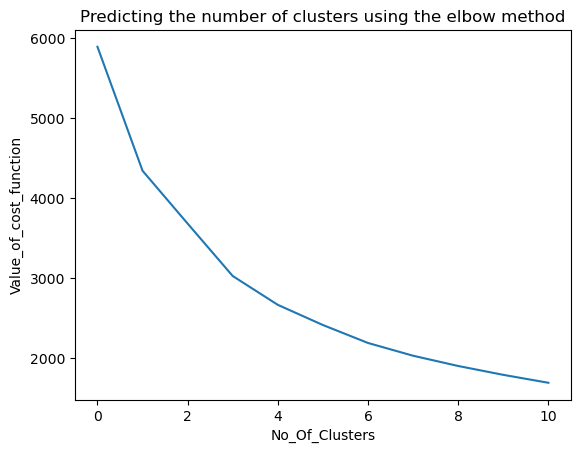

In [41]:
elb=[]
range_n_clusters=[2,3,4,5,6,7,8,9,10,11,12]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(df_scaled)
    elb.append(kmeans.inertia_)
plt.plot(elb)
plt.title('Predicting the number of clusters using the elbow method')
plt.xlabel('No_Of_Clusters')
plt.ylabel('Value_of_cost_function')
plt.show()

In [42]:
kmeans=KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_scaled)
l=kmeans.labels_
print(kmeans.labels_)

C:\Users\Sarah\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[2 2 1 ... 0 2 1]


In [43]:
cluster_centers =kmeans.cluster_centers_
cluster_centers

array([[0.74855007, 0.14152986, 0.67839086],
       [0.57470421, 0.15790508, 0.53067467],
       [0.70615134, 0.34564979, 0.63109116]])

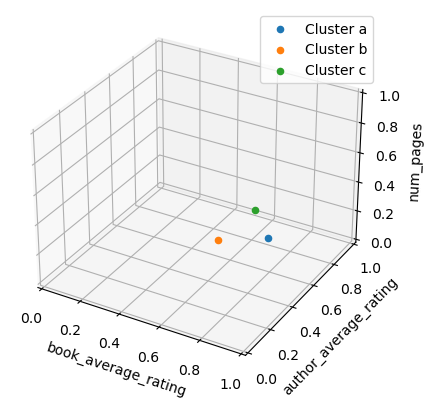

In [44]:
a=cluster_centers[0]
a_attr_cent=a[0],a[2],a[1]

b=cluster_centers[1]
b_attr_cent=b[0],b[2],b[1]

c=cluster_centers[2]
c_attr_cent=c[0],c[2],c[1]




a_attr_cent
fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

axis.set_xlabel('book_average_rating')
axis.set_ylabel('author_average_rating')
axis.set_zlabel('num_pages')

axis.scatter(a_attr_cent[0],a_attr_cent[1],a_attr_cent[2], label='Cluster a')
axis.scatter(b_attr_cent[0],b_attr_cent[1],b_attr_cent[2], label='Cluster b')
axis.scatter(c_attr_cent[0],c_attr_cent[1],c_attr_cent[2], label='Cluster c')


plt.xlim(0,1)
plt.ylim(0,1)
axis.set_zlim(0,1)

axis.legend()
plt.show()

In [45]:
df_scaled['Cluster_Id']=l
df_scaled

,book_average_rating,num_pages,author_average_rating,Cluster_Id
0,0.713864,0.484262,0.612903,2
1,0.634218,0.271186,0.612903,2
2,0.557522,0.284100,0.612903,1
3,0.734513,0.199354,0.612903,0
4,0.486726,0.266344,0.612903,1
...,...,...,...,...
241308,0.622419,0.180791,0.541219,1
241309,0.752212,0.206618,0.720430,0
241310,0.725664,0.154964,0.594982,0
241311,0.964602,0.348668,0.781362,2


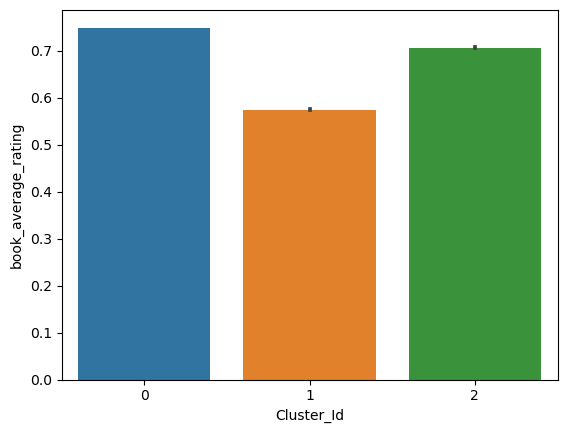

In [46]:
sns.barplot(x='Cluster_Id', y='book_average_rating', data=df_scaled)
plt.show()

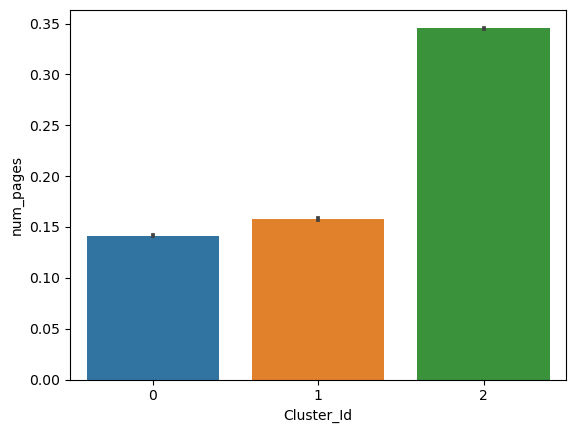

In [47]:
sns.barplot(x='Cluster_Id', y='num_pages', data=df_scaled)
plt.show()

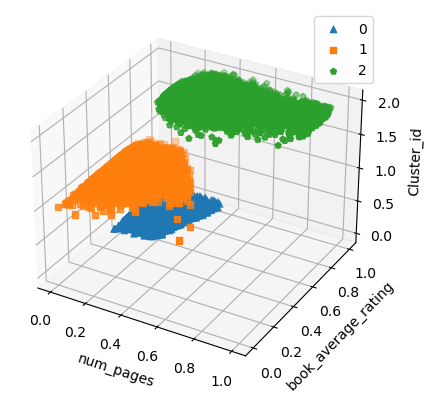

In [48]:
fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

groups = df_scaled.groupby(by='Cluster_Id')

axis.set_xlabel('num_pages')
axis.set_ylabel('book_average_rating')
axis.set_zlabel('Cluster_id')

shapes_dict = dict(zip(groups.indices.keys(),['^','s','p','8','*']))

for name, group in groups:
    axis.scatter(group.num_pages, group.book_average_rating, group.Cluster_Id,marker=shapes_dict[name], label=name)

axis.legend()
plt.show()

In [49]:
df_scaled['book_id'] = df['book_id']
df_scaled['author_id'] = df['author_id']
df_scaled

,book_average_rating,num_pages,author_average_rating,Cluster_Id,book_id,author_id
0,0.713864,0.484262,0.612903,2,7327624,10333.0
1,0.634218,0.271186,0.612903,2,438134,10333.0
2,0.557522,0.284100,0.612903,1,438132,10333.0
3,0.734513,0.199354,0.612903,0,21538610,10333.0
4,0.486726,0.266344,0.612903,1,898954,10333.0
...,...,...,...,...,...,...
241308,0.622419,0.180791,0.541219,1,17160916,5298385.0
241309,0.752212,0.206618,0.720430,0,18333457,5298385.0
241310,0.725664,0.154964,0.594982,0,18740174,5298385.0
241311,0.964602,0.348668,0.781362,2,18333462,5298385.0


In [50]:
df.columns

Index(['Unnamed: 0', 'isbn', 'book_text_review_count', 'series',
       'country_code', 'language_code', 'popular_shelves', 'asin', 'is_ebook',
       'book_average_rating', 'kindle_asin', 'similar_books', 'description',
       'format', 'link', 'author_id', 'publisher', 'num_pages',
       'publication_day', 'isbn13', 'publication_month', 'edition_information',
       'publication_year', 'url', 'image_url', 'book_id', 'book_ratings_count',
       'work_id', 'title', 'title_without_series', 'author_average_rating',
       'author_text_reviews_count', 'author_name', 'author_ratings_count',
       'Ratings_Dist'],
      dtype='object')

In [51]:
df_scaled['author_name'] = df['author_name']
df_scaled['book_title'] = df['title']
df_scaled

,book_average_rating,num_pages,author_average_rating,Cluster_Id,book_id,author_id,author_name,book_title
0,0.713864,0.484262,0.612903,2,7327624,10333.0,Barbara Hambly,"The Unschooled Wizard (Sun Wolf and Starhawk, ..."
1,0.634218,0.271186,0.612903,2,438134,10333.0,Barbara Hambly,Bride of the Rat God
2,0.557522,0.284100,0.612903,1,438132,10333.0,Barbara Hambly,"Knight of the Demon Queen (Winterlands, #3)"
3,0.734513,0.199354,0.612903,0,21538610,10333.0,Barbara Hambly,"Crimson Angel (Benjamin January, #13)"
4,0.486726,0.266344,0.612903,1,898954,10333.0,Barbara Hambly,Children of the Jedi
...,...,...,...,...,...,...,...,...
241308,0.622419,0.180791,0.541219,1,17160916,5298385.0,Jennifer Loren,The Devil's Son
241309,0.752212,0.206618,0.720430,0,18333457,5298385.0,Jennifer Loren,"The Devil's Revenge (The Devil's Eyes, #2)"
241310,0.725664,0.154964,0.594982,0,18740174,5298385.0,Jennifer Loren,The Laws of Kings
241311,0.964602,0.348668,0.781362,2,18333462,5298385.0,Jennifer Loren,"The Devil's Son (The Devil's Eyes, #3)"


In [52]:
clust_0 = df_scaled[df_scaled['Cluster_Id']==0]  
clust_0.sample(30)

,book_average_rating,num_pages,author_average_rating,Cluster_Id,book_id,author_id,author_name,book_title
92383,0.687316,0.100888,0.627240,0,25277112,8431087.0,S.K. Tremayne,The Ice Twins
76541,0.640118,0.096852,0.677419,0,21741256,7078198.0,Gay N. Lewis,A Blizzard Wedding (Lightning Strikes #3)
126332,0.823009,0.117837,0.774194,0,23434081,12542.0,Bernard Cornwell,"Waterloo: The History of Four Days, Three Armi..."
189930,0.681416,0.154964,0.587814,0,899139,5951.0,Jeff Smith,Bone Volume 6: Old Man's Cave
234876,0.672566,0.058111,0.727599,0,22725532,7759811.0,L.A. Casey,"Bronagh (Slater Brothers, #1.5)"
128137,0.740413,0.168684,0.666667,0,25596472,150038.0,Cassandra Clare,Nothing but Shadows (Tales from the Shadowhunt...
82075,0.825959,0.154964,0.763441,0,7380399,815.0,Carlos Ruiz Zafon,The Angel's Game (The Cemetery of Forgotten Bo...
155302,0.755162,0.135593,0.684588,0,163,91.0,John Banville,The Untouchable
183719,0.867257,0.075868,0.634409,0,17317104,6883613.0,Ernest Dempsey,The Secret of the Stones (Sean Wyatt #1; Lost ...
137389,0.705015,0.077482,0.637993,0,7543085,7305.0,Mary McCarthy,The Group


In [53]:
clust_0 = df_scaled[df_scaled['Cluster_Id']==1]  
clust_0.sample(30)

,book_average_rating,num_pages,author_average_rating,Cluster_Id,book_id,author_id,author_name,book_title
94747,0.616519,0.153349,0.462366,1,10361320,8603.0,Shelley Munro,Stranger Things Happen
44402,0.631268,0.129136,0.627240,1,10163623,904719.0,Jo Nesbo,"Nemesis (Harry Hole, #4)"
47487,0.569322,0.035513,0.641577,1,536937,9219.0,Adriana Trigiani,The Queen of the Big Time
22043,0.651917,0.183212,0.551971,1,18775477,12948.0,Rumiko Takahashi,"RIN-NE, Vol. 15"
217996,0.548673,0.022599,0.516129,1,20262014,1451404.0,John Corwin,"Infernal Father of Mine (Overworld Chronicles,..."
236255,0.536873,0.221953,0.437276,1,15814423,63681.0,Elinor Lipman,I Can't Complain: (All Too) Personal Essays
88046,0.637168,0.077482,0.548387,1,418614,3535.0,William Faulkner,"The Bear, Old Man, and Spotted Horses: Three F..."
85630,0.510324,0.080710,0.734767,1,33407091,255473.0,Susan Page Davis,The Saboteur
140725,0.536873,0.095238,0.541219,1,154254,46810.0,Murray N. Rothbard,The Case for the 100 Percent Gold Dollar
19182,0.569322,0.072639,0.534050,1,102144,5922.0,Peter Robinson,"Gallows View (Inspector Banks, #1)"


In [54]:
clust_0 = df_scaled[df_scaled['Cluster_Id']==2]  
clust_0.sample(30)

,book_average_rating,num_pages,author_average_rating,Cluster_Id,book_id,author_id,author_name,book_title
14143,0.616519,0.335755,0.594982,2,18216813,4430.0,Sherrilyn Kenyon,"Cloak and Silence (The League, #5.5)"
16301,0.749263,0.232446,0.569892,2,18909571,123715.0,Agatha Christie,A Christmas Tragedy: A Short Story
71167,0.678466,0.230024,0.605735,2,191104,6975.0,Peter Matthiessen,Sal Si Puedes (Escape If You Can): Cesar Chave...
18198,0.734513,0.426150,0.663082,2,16146015,745566.0,Suzuki Tanaka,"His Favorite, Vol. 5"
241233,0.802360,0.306699,0.759857,2,12508379,1380435.0,Yukako Kabei,"Kieli, Volume 5: The Sunlit Garden Where It Be..."
30695,0.696165,0.437450,0.652330,2,11434980,31688.0,M.T. Anderson,"Zombie Mommy (Pals in Peril, #5)"
115149,0.710914,0.271186,0.587814,2,21051693,3499929.0,Jake Bible,"Dead Team Alpha (Dead Team Alpha, #1)"
159976,0.643068,0.297014,0.530466,2,25464641,5399389.0,Sharon Kleve,Second Chance Cinderella
203776,0.637168,0.439064,0.562724,2,18870754,6869939.0,Jane Davis,A Funeral for an Owl
139243,0.696165,0.232446,0.602151,2,1265942,4773.0,Bruce Catton,Gettysburg: The Final Fury


In [56]:
df_scaled[df_scaled['author_name'] == 'Julia Quinn']

,book_average_rating,num_pages,author_average_rating,Cluster_Id,book_id,author_id,author_name,book_title
60284,0.566372,0.350282,0.566308,2,27239109,63898.0,Julia Quinn,"Because of Miss Bridgerton (Rokesbys, #1)"
60285,0.622419,0.632768,0.566308,2,8176537,63898.0,Julia Quinn,Lady Whistledown Strikes Back (Lady Whistledow...
60286,0.566372,0.289750,0.566308,1,29772443,63898.0,Julia Quinn,Four Weddings and a Sixpence: An Anthology
60287,0.610619,0.516546,0.566308,2,16145420,63898.0,Julia Quinn,The Bridgertons: Happily Ever After (Bridgerto...
60288,0.631268,0.309927,0.566308,2,6991256,63898.0,Julia Quinn,The Secret Diaries of Miss Miranda Cheever (Be...
...,...,...,...,...,...,...,...,...
60379,0.607670,0.247780,0.577061,1,16065796,63898.0,Julia Quinn,The Sum of All Kisses (Smythe-Smith Quartet #3)
60380,0.637168,0.297014,0.577061,2,8682419,63898.0,Julia Quinn,"The Lady Most Likely... (Lady Most..., #1)"
60381,0.684366,0.271186,0.577061,2,8374862,63898.0,Julia Quinn,"Ten Things I Love About You (Bevelstoke, #3)"
60382,0.696165,0.168684,0.577061,0,34615256,63898.0,Julia Quinn,"To Sir Phillip, With Love With 2nd Epilogue"


In [57]:
df_scaled

,book_average_rating,num_pages,author_average_rating,Cluster_Id,book_id,author_id,author_name,book_title
0,0.713864,0.484262,0.612903,2,7327624,10333.0,Barbara Hambly,"The Unschooled Wizard (Sun Wolf and Starhawk, ..."
1,0.634218,0.271186,0.612903,2,438134,10333.0,Barbara Hambly,Bride of the Rat God
2,0.557522,0.284100,0.612903,1,438132,10333.0,Barbara Hambly,"Knight of the Demon Queen (Winterlands, #3)"
3,0.734513,0.199354,0.612903,0,21538610,10333.0,Barbara Hambly,"Crimson Angel (Benjamin January, #13)"
4,0.486726,0.266344,0.612903,1,898954,10333.0,Barbara Hambly,Children of the Jedi
...,...,...,...,...,...,...,...,...
241308,0.622419,0.180791,0.541219,1,17160916,5298385.0,Jennifer Loren,The Devil's Son
241309,0.752212,0.206618,0.720430,0,18333457,5298385.0,Jennifer Loren,"The Devil's Revenge (The Devil's Eyes, #2)"
241310,0.725664,0.154964,0.594982,0,18740174,5298385.0,Jennifer Loren,The Laws of Kings
241311,0.964602,0.348668,0.781362,2,18333462,5298385.0,Jennifer Loren,"The Devil's Son (The Devil's Eyes, #3)"


In [58]:
df_scaled.to_csv('dataset_kmeans_clusters.csv')

In [59]:
kmeansDf = pd.read_csv('.\dataset_kmeans_clusters.csv')

In [60]:
%matplotlib notebook

<IPython.core.display.Javascript object>


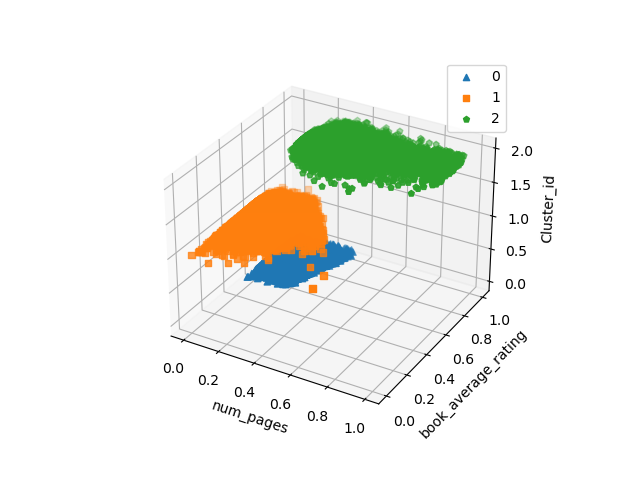

In [61]:
fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

groups = kmeansDf.groupby(by='Cluster_Id')

axis.set_xlabel('num_pages')
axis.set_ylabel('book_average_rating')
axis.set_zlabel('Cluster_id')

shapes_dict = dict(zip(groups.indices.keys(),['^','s','p','8','*']))

for name, group in groups:
    axis.scatter(group.num_pages, group.book_average_rating, group.Cluster_Id,marker=shapes_dict[name], label=name)

axis.legend()
plt.show()

<IPython.core.display.Javascript object>


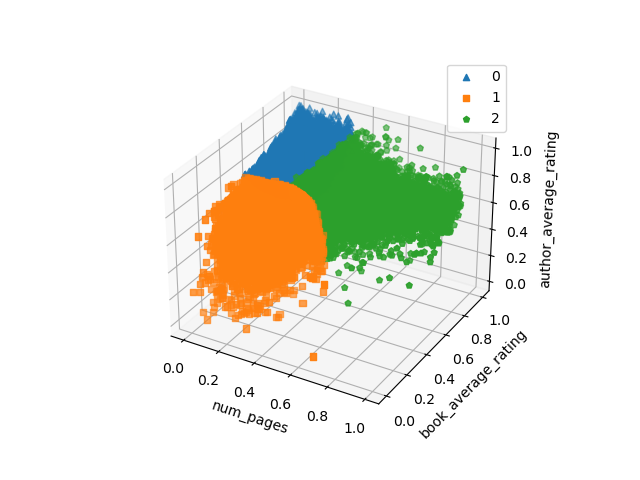

In [62]:
fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

groups = kmeansDf.groupby(by='Cluster_Id')

axis.set_xlabel('num_pages')
axis.set_ylabel('book_average_rating')
axis.set_zlabel('author_average_rating')

shapes_dict = dict(zip(groups.indices.keys(),['^','s','p','8','*']))

for name, group in groups:
    axis.scatter(group.num_pages, group.book_average_rating, group.author_average_rating,marker=shapes_dict[name], label=name)

axis.legend()
plt.show()

In [67]:
kmeansDf.sample(10)

,Unnamed: 0,book_average_rating,num_pages,author_average_rating,Cluster_Id,book_id,author_id,author_name,book_title
102846,102846,0.781711,0.229217,0.702509,0,18722890,45898.0,Sarah Morgan,"Suddenly Last Summer (O'Neil Brothers, #2)"
23881,23881,0.787611,0.426150,0.663082,2,341331,195778.0,Cindy Gerard,"Under the Wire (The Bodyguards, #5)"
124999,124999,0.637168,0.253430,0.559140,1,93374,53559.0,Katsuhiro Otomo,"Akira, Vol. 4"
227996,227996,0.681416,0.266344,0.623656,2,13336482,5418031.0,P.J. Day,"Vampire Revealed (King's Blood, #1)"
5342,5342,0.799410,0.274415,0.716846,2,17166259,13757.0,Lisa Jackson,The Night Before (Savannah #1)
35613,35613,0.681416,0.071025,0.623656,0,29908929,15180391.0,Canjian Li De Niu,"Lian Tribal Clan (True Martial World, #1)"
159677,159677,0.619469,0.258273,0.594982,1,2907748,2457847.0,Lady Augusta Gregory,Complete Irish Mythology
36547,36547,0.784661,0.122680,0.695341,0,6899744,8605.0,Mandy M. Roth,"Pike's Peak (League of the Unnatural, #1)"
133575,133575,0.486726,0.076675,0.516129,1,18889292,20258.0,Lisa Scottoline,Keep Quiet
182665,182665,0.522124,0.088781,0.602151,1,10490132,71185.0,Jill Barnett,The Days of Summer


In [68]:
book = "The Dream Hunter"

In [69]:
kmeansDf[kmeansDf['book_title'] == book]

,Unnamed: 0,book_average_rating,num_pages,author_average_rating,Cluster_Id,book_id,author_id,author_name,book_title
47515,47515,0.572271,0.180791,0.612903,1,18269434,23890.0,Laura Kinsale,The Dream Hunter


In [70]:
cluster = 1

In [71]:
kmeansDf[kmeansDf['Cluster_Id'] == 2].sample(10)

,Unnamed: 0,book_average_rating,num_pages,author_average_rating,Cluster_Id,book_id,author_id,author_name,book_title
7878,7878,0.713864,0.309927,0.623656,2,7200290,24781.0,Dan Slott,"The Mighty Avengers, Volume 6: The Unspoken"
22142,22142,0.584071,0.355932,0.634409,2,4863710,5031312.0,Dante Alighieri,Vita Nuova
131735,131735,0.693215,0.309927,0.663082,2,1761431,5762007.0,A.R. Gurney,The Cocktail Hour
201437,201437,0.716814,0.314770,0.655914,2,10300449,2830569.0,Karuho Shiina,"Kimi ni Todoke: From Me to You, Vol. 9"
96841,96841,0.557522,0.427764,0.645161,2,89324,1847.0,Mark Kurlansky,A Continent of Islands: Searching for the Cari...
98598,98598,0.684366,0.232446,0.591398,2,11518360,4495500.0,Claudy Conn,"Shadow Love: Stalkers (Shadow Vampires, #1)"
71546,71546,0.846608,0.471348,0.767025,2,5071996,108424.0,Patrick Rothfuss,The Name of the Wind (The Kingkiller Chronicle...
2136,2136,0.746313,0.309927,0.645161,2,5590172,16667.0,Isaac Asimov,Nightfall and Other Stories
200183,200183,0.589971,0.355932,0.505376,2,26779822,255466.0,Nick Spencer,"Morning Glories, Vol. 9: Assembly"
76848,76848,0.702065,0.245359,0.623656,2,9424201,103243.0,Julia Donaldson,Toddle Waddle
